In [103]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [21]:
#read and display training data
train = pd.read_csv("/Users/srividyaraghavan/Downloads/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#read and display test dataset
test = pd.read_csv("/Users/srividyaraghavan/Downloads/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#label data

Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

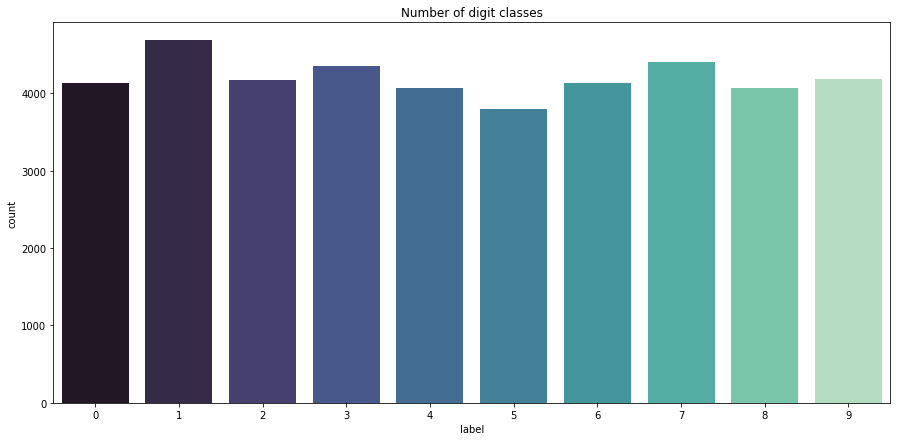

In [24]:
#visualize the number of digit classes (0-9)

plt.figure(figsize=(15,7))
g = sns.countplot(Y_train, palette="mako")
plt.title("Number of digit classes")
Y_train.value_counts()

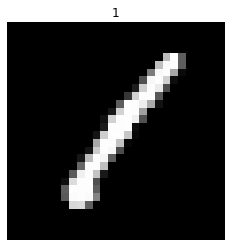

In [25]:
#sample data
img = X_train.iloc[0].to_numpy()

#reshape image array size 784 into 28x28
img = img.reshape((28,28))

#without cmap=gray, will show in default heatmap color
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

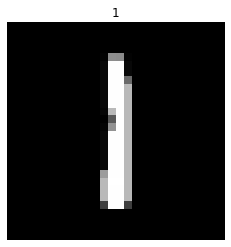

In [26]:
#same thing, using data #3 (index [2] of array)
img = X_train.iloc[2].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[2,0])
plt.axis("off")
plt.show()

In [27]:
#normalize the data (convert to grayscale) so the CNN works faster & more accurately

X_train = X_train/255.0
test = test/255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [28]:
#reshape all images to 28x28 (keras requires an extra field, so 28x28x1)

X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [29]:
#Label encoding (converting to numerial, machine-readable form)
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)

In [30]:
#use scikit-learn to split the data into testing and training data
# train size: 90%
#test size: 10%

from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


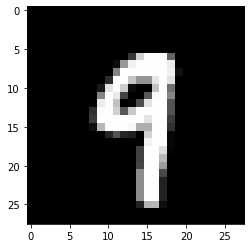

In [68]:
#show example
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

In [94]:
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras import models
from keras.utils.np_utils import to_categorical #convert to one-hot-encoding (binary vars instead of int)
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import backend as K

model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#add padding, filters, relu activation function
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [95]:
#Adam optimizer with 0.001 learning rate
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [96]:
#compile model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [97]:
epochs = 30  #for better result increase the epochs
batch_size = 250

In [98]:
#alter some of the data to avoid overfitting (data augmentation)
datagen = ImageDataGenerator(
        featurewise_center=False,# set input mean to 0 over the dataset
        samplewise_center=False,# set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1,# Randomly zoom image 10%
        width_shift_range=0.1, # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [99]:
#fit model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/30
151/151 [==============================] - 40s 264ms/step - batch: 75.0000 - size: 248.6755 - loss: 1.0992 - acc: 0.6306 - val_loss: 0.2425 - val_acc: 0.9319
Epoch 2/30
151/151 [==============================] - 22s 145ms/step - batch: 75.0000 - size: 248.6755 - loss: 0.4411 - acc: 0.8583 - val_loss: 0.1468 - val_acc: 0.9569
Epoch 3/30
151/151 [==============================] - 21s 140ms/step - batch: 75.0000 - size: 248.6755 - loss: 0.3251 - acc: 0.8983 - val_loss: 0.1063 - val_acc: 0.9710
Epoch 4/30
151/151 [==============================] - 21s 140ms/step - batch: 75.0000 - size: 248.6755 - loss: 0.2637 - acc: 0.9164 - val_loss: 0.0945 - val_acc: 0.9705
Epoch 5/30
151/151 [==============================] - 21s 142ms/step - batch: 75.0000 - size: 248.6755 - loss: 0.2329 - acc: 0.9280 - val_loss: 0.0778 - val_acc: 0.9788
Epoch 6/30
151/151 [==============================] - 21s 141ms/step - batch: 75.0000 - size: 248.6755 - loss: 0.2151 - acc: 0.9332 - val_loss: 0.0683 - va

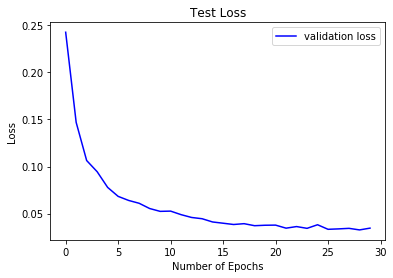

In [100]:
#Evaluate: plot the loss
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
#conclusion: loss is <0.05 by 30 epochs. Increase epochs for better results

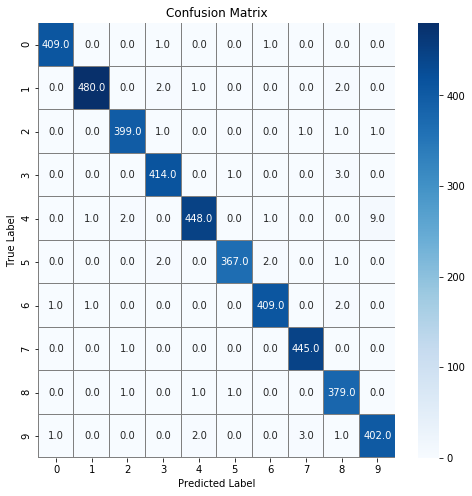

In [102]:
#show confusion matrix: further eval

#predict validation set
Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(Y_val,axis = 1) 
#compute confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
#plot
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()